## Task 1

In [38]:
#Import and define function, reference: week4 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

def show_audio(y, sr=22050, normalise=True):
    fig, ax = plt.subplots(figsize=(16,4))
    ax.set_ylim(-1,1) 
    librosa.display.waveplot(np.array(y), sr=sr, ax=ax)
    return ipd.Audio(y, rate=sr, normalize=normalise, autoplay=True)

4726
1 1000
2 666.6666666666661
3 444.44444444444525
4 296.2962962962956
5 197.53086419753163
6 131.68724279835442
7 87.79149519890052
8 58.52766346593853
9 39.01844231062569
10 26.012294873748033
11 17.341529915829597
12 11.561019943888823
13 7.70734662925679
14 5.138231086166343
15 3.425487390777562
16 2.283658260523225
17 1.5224388403439661
18 1.014959226900828
19 0.6766394846054027
20 0.4510929897369351
21 0.30072865981492214
22 0.2004857732099481
23 0.13365718214481603
24 0.08910478810139466
25 0.0594031920627458
26 0.03960212804668117
27 0.02640141869778745
28 0.017600945808226243
29 0.011733963852748275
30 0.00782264256849885


/Users/ivanfeng/opt/anaconda3/lib/python3.8/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


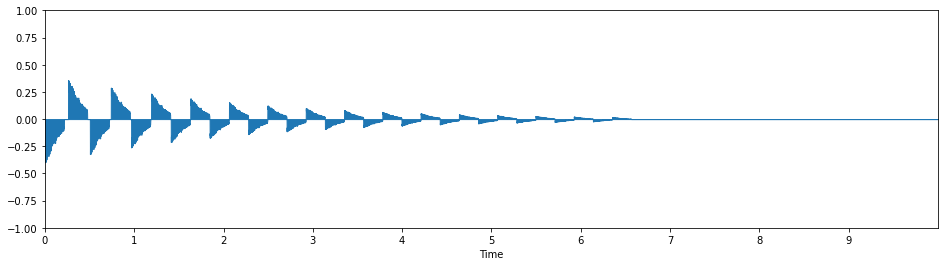

In [39]:
file_path = '../audio/hat1.wav'
audio_data, sr = librosa.load(file_path)
delay = 1000
speed = 1.5
decay = 0.9
new_file_length = sr * 10
new_file = np.array([np.zeros(new_file_length), np.zeros(new_file_length)], dtype = float)
print(len(audio_data)) #print out the whole length 


start = 0 
i = 0
while i < 30: #30 is a picked for better sound effect. It means that there are 30 times iteration. 
    audio_update = audio_data * decay ** i #sound decay: each time is weaker than last round
    end = start + len(audio_data) 
    row = 0 #write in two channels 
    if i % 2 ==0:
        row = 1 

    new_file[row][int(start):int(end)] = audio_update 

    start = end + delay  
    delay = delay / speed #in each iteration, audio length = end + reduced delay (speed acceleration)
    
    i+=1 
    
    print(i, start-end) #this step for check delay update: in each iteration, delay should be shorten 

show_audio(new_file) 

# Use a conditional to determine when to exit the loop
while :

    #Build up delay effect with audio_data into new_file within the loop
    new_file[]
    
       #Choose where to place the source audio into the new_file placeholder
    
    #Before the next bounce
    
    
        #The left/right channel should switch
       
        #The reflection should get quieter (eventually reaching 0)
       
        #The delay until the next bounce should get shorter (eventually reaching 0)          

## Task 2

In [1]:
import os
import cv2
import numpy as np 
import IPython.display as ipd
import librosa
from PIL import Image, ImageOps #ImageOps: mirror a photo, reference https://note.nkmk.me/en/python-pillow-flip-mirror/

[800, 1024]
800 709
683 1024
693 800
800 541
800 721
536 800
518 800


<ipython-input-53-84bc0a12f2f2>:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  image2= np.array(image2)


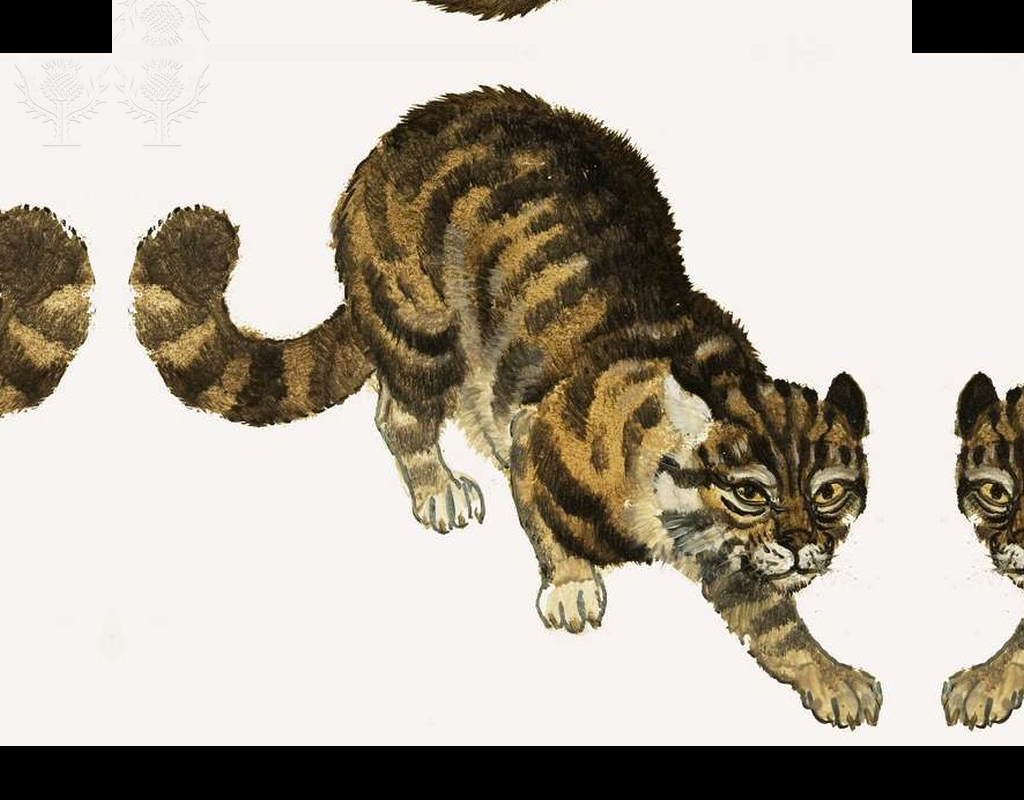

In [53]:
folder_path = "../images/cats"

#Start with 0 (anything will be bigger than this)
biggest = [0, 0]
#Go through all the files in the folder, find the longest and widest images 
for root, dirs, files in os.walk(folder_path, topdown=False):
    for name in files:
        if ".jpg" in name:
            f = os.path.join(root, name)
            im = np.array(Image.open(f))
            #update max height
            if im.shape[0] > biggest[0]:
                biggest[0] = im.shape[0]
            #update max width
            if im.shape[1] > biggest[1]:
                biggest[1] = im.shape[1]
print(biggest) #check on the size of biggest photo



image2 = [] #a list contains all images in the file
image_list = [] #a new list contain empty new images 
#Go through all the files in the folder
for root, dirs, files in os.walk(folder_path, topdown=False):
    for name in files:
        if not ".DS_Store" in name:
        #Load in the image in image2 (new image from the folder)
            f = os.path.join(root, name)
            im = np.array(Image.open(f))
            image2 = image2 + [im]

image2 = np.array(image2)

image2_amount = image2.shape[0] 


#how to add extra pixels in height 
#image = np.append(image,image[-1:,:,:],axis = 0)


for i in range(image2_amount):
    
        #create a background picture  
        image1 = np.array(Image.new(mode="RGB", size=(biggest[1], biggest[0])))
        image_list.append(image1)
        
        image_2=image2[i] #iterate every image2 in image2 list 
        
        
        image1_height = image1.shape[0]
        image1_width = image1.shape[1]
        
        image_2_height = image_2.shape[0] 
        image_2_width = image_2.shape[1]
        
        print (image_2_height,image_2_width)
            
        #Calculate these points which determine where image2 will be inserted
        x_axis_start = (image1_width - image_2_width) // 2
        x_axis_end = x_axis_start + image_2_width 
        y_axis_start = (image1_height - image_2_height) // 2
        y_axis_end = y_axis_start + image_2_height
        
        #step1: use coordinates above to copy image2 onto the centre of image1
        image_list[i][y_axis_start:y_axis_end,x_axis_start: x_axis_end] = image_2
        
        #step 2: copy and flip 
        image2_top = image_2[0:y_axis_start,0:image_2_width]
        image2_top_flip = cv2.flip(image2_top,0) 
        
        
        image2_bottom = image_2[(image_2_height-y_axis_start):image_2_height,0:image_2_width] #image 2 is lack of one pixel in height
        image2_bottom_flip = cv2.flip(image2_bottom,0) 
        
        
        image2_left = image_2[0:image_2_height, 0:x_axis_start]
        image2_left_flip = cv2.flip(image2_left,1) 
        
        
        image2_right = image_2[0:image_2_height,(image_2_width-x_axis_start):image_2_width]
        image2_right_flip = cv2.flip(image2_right,1) 
       
       
        #step 3: insert flip cut into background image
        if y_axis_start >0 and x_axis_start >0:
            image_list[i][0:y_axis_start,x_axis_start:x_axis_end] = image2_top_flip
            #image_list[i][y_axis_end:image1_height,x_axis_start:x_axis_end] = image2_bottom_flip
            image_list[i][y_axis_start:y_axis_end,0:x_axis_start] = image2_left_flip
            image_list[i][y_axis_start:y_axis_end,x_axis_end:image1_width] = image2_right_flip      
            
        elif y_axis_start > 0 and x_axis_start <= 0: 
            image_list[i][0:y_axis_start,x_axis_start:x_axis_end] = image2_top_flip
            #image_list[i][y_axis_end:image1_height,x_axis_start:x_axis_end] = image2_bottom_flip
    
        elif y_axis_start <= 0 and x_axis_start >0:
            image_list[i][y_axis_start:y_axis_end,0:x_axis_start] = image2_left_flip
            image_list[i][y_axis_start:y_axis_end,x_axis_end:image1_width-1] = image2_right_flip 
                   
Image.fromarray(image_list[2])

### the program works well if not inserting flipped bottoms 
### the picture is lack of one pixel in height 
### the error is caused by floor division "//" that returns the closest integer  which could be less than or equal to a specified value.